# [Data Ingestion with `pandas`](https://www.datacamp.com/completed/statement-of-accomplishment/course/8e756dabad3dcb45bddbb6375c70f7a6b8e2f796)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/adamelliotfields/datacamp/blob/main/notebooks/courses/data_ingestion_with_pandas/notebook.ipynb)
[![Render nbviewer](https://raw.githubusercontent.com/jupyter/design/main/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/adamelliotfields/datacamp/blob/main/notebooks/courses/data_ingestion_with_pandas/notebook.ipynb)

**Contents:**
  * [CSV](#CSV-🔝)
  * [Excel](#Excel-🔝)
  * [JSON](#JSON-🔝)

In [1]:
%matplotlib inline

import json
import matplotlib.pyplot as plt
import pandas as pd
import sys

from pandas import json_normalize

pd.set_option("display.width", sys.maxsize)


## CSV [🔝](#Data-Ingestion-with-pandas)

See [`pandas.read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

### Specific Columns

In [2]:
cols = ["zipcode", "agi_stub", "mars1", "MARS2", "NUMDEP"]
data = pd.read_csv("vt_tax_data_2016.csv", usecols=cols)
print(data.head())


   zipcode  agi_stub  mars1  MARS2  NUMDEP
0        0         1  85090  14170   26200
1        0         2  51960  18820   32310
2        0         3  19540  22650   23610
3        0         4   5830  22190   18860
4        0         5   3900  33800   30330


### Specific Rows

In [3]:
# fmt: off
names = [
    'STATEFIPS', 'STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'PREP', 'N2',
    'NUMDEP', 'TOTAL_VITA', 'VITA', 'TCE', 'VITA_EIC', 'RAL', 'RAC', 'ELDERLY', 'A00100',
    'N02650', 'A02650', 'N00200', 'A00200', 'N00300', 'A00300', 'N00600', 'A00600', 'N00650',
    'A00650', 'N00700', 'A00700', 'N00900', 'A00900', 'N01000', 'A01000', 'N01400', 'A01400',
    'N01700', 'A01700', 'SCHF', 'N02300', 'A02300', 'N02500', 'A02500', 'N26270', 'A26270',
    'N02900', 'A02900', 'N03220', 'A03220', 'N03300', 'A03300', 'N03270', 'A03270', 'N03150',
    'A03150', 'N03210', 'A03210', 'N03230', 'A03230', 'N03240', 'A03240', 'N04470', 'A04470',
    'A00101', 'N17000', 'A17000', 'N18425', 'A18425', 'N18450', 'A18450', 'N18500', 'A18500',
    'N18800', 'A18800', 'N18300', 'A18300', 'N19300', 'A19300', 'N19500', 'A19500', 'N19530',
    'A19530', 'N19550', 'A19550', 'N19570', 'A19570', 'N19700', 'A19700', 'N20800', 'A20800',
    'n21020', 'a21020', 'N04800', 'A04800', 'N05800', 'A05800', 'N09600', 'A09600', 'N05780',
    'A05780', 'N07100', 'A07100', 'N07300', 'A07300', 'N07180', 'A07180', 'N07230', 'A07230',
    'N07240', 'A07240', 'N07220', 'A07220', 'N07260', 'A07260', 'N09400', 'A09400', 'N85770',
    'A85770', 'N85775', 'A85775', 'N09750', 'A09750', 'N10600', 'A10600', 'N59660', 'A59660',
    'N59720', 'A59720', 'N11070', 'A11070', 'N10960', 'A10960', 'N11560', 'A11560', 'N06500',
    'A06500', 'N10300', 'A10300', 'N85530', 'A85530', 'N85300', 'A85300', 'N11901', 'A11901',
    'N11902', 'A11902',
]
# fmt: on

vt_data_first500 = pd.read_csv("vt_tax_data_2016.csv", nrows=500, header=None, names=names)
vt_data_next500 = pd.read_csv(
    "vt_tax_data_2016.csv", skiprows=500, nrows=500, header=None, names=list(vt_data_first500)
)

print(vt_data_next500.head())


   STATEFIPS STATE  zipcode  agi_stub   N1  mars1  MARS2  MARS4  PREP   N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  A11901  N11902  A11902
0         50    VT     5356         2  180    120     40      0    90  250  ...     170     497       0       0       0       0      50      76     130     212
1         50    VT     5356         3   80     50     40      0    40  150  ...      80     460       0       0       0       0      40     142      50     148
2         50    VT     5356         4   50      0     40      0    40  110  ...      50     471       0       0       0       0       0       0      30      87
3         50    VT     5356         5   80     20     50      0    60  170  ...      80    2229       0       0       0       0      30     531      30     246
4         50    VT     5356         6    0      0      0      0     0    0  ...       0       0       0       0       0       0       0       0       0       0

[5 rows x 147 columns]


### Missing Data

Pandas automatically handles missing or _NA_ (not available) values when loading. Strings like "N/A" or "null" in a CSV would be considered NA values. In the resulting DataFrame, missing values are represented as `NaN` if they are numerical and `None` otherwise.

You can also specify additional values to be treated as NA using the `na_values` kwarg.

In [4]:
# if a `zipcode` is 0 then it should be considered missing as well
null_values = {"zipcode": 0}
data = pd.read_csv("vt_tax_data_2016.csv", na_values=null_values)
print(data[data.zipcode.isna()])


   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP      N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  A11901  N11902  A11902
0         50    VT      NaN         1  111580  85090  14170  10740  45360  130630  ...   53660   50699       0       0       0       0   10820    9734   88260  138337
1         50    VT      NaN         2   82760  51960  18820  11310  35600  132950  ...   74340  221146       0       0       0       0   12820   20029   68760  151729
2         50    VT      NaN         3   46270  19540  22650   3620  24140   91870  ...   44860  266097       0       0       0       0   10810   24499   34600   90583
3         50    VT      NaN         4   30070   5830  22190    960  16060   71610  ...   29580  264678       0       0       0       0    7320   21573   21300   67045
4         50    VT      NaN         5   39530   3900  33800    590  22500  103710  ...   39170  731963      40      24       0       0   12500   67761   23320  10303

### Corrupt Data

In [5]:
try:
    # note that `error_bad_lines` and `warn_bad_lines` were removed years ago
    # use `on_bad_lines` instead
    data = pd.read_csv("vt_tax_data_2016_corrupt.csv", on_bad_lines="warn")

except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")


Skipping line 5: expected 147 fields, saw 148
Skipping line 9: expected 147 fields, saw 148
Skipping line 51: expected 147 fields, saw 148



## Excel [🔝](#Data-Ingestion-with-pandas)

See [`pandas.read_excel`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

### Specific Columns and Rows

In [6]:
col_string = "AD, AW:BA"
survey_responses = pd.read_excel("fcc_survey_headers.xlsx", skiprows=2, usecols=col_string)
print(survey_responses.columns)


Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo', 'JobRoleInterest', 'JobWherePref'], dtype='object')


### Specific Sheets

By default `read_excel` loads only the first sheet. You can use the `sheet_name` kwarg and specify either a string for the sheet name or an integer for the sheet index. You can also pass a list of strings or integers to load multiple sheets.

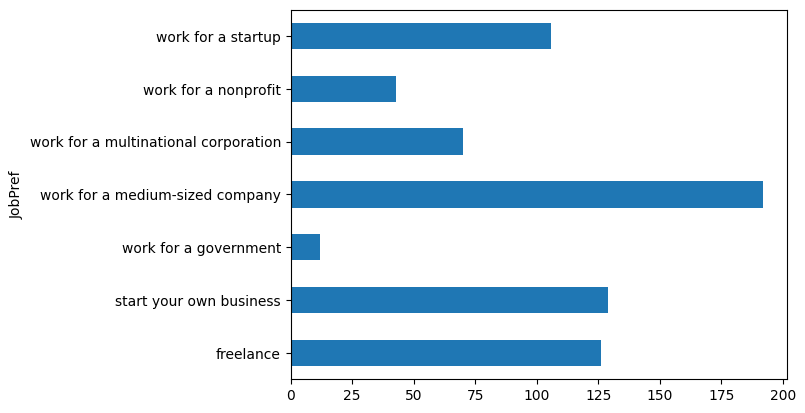

In [7]:
# responses_2017 = pd.read_excel("fcc_survey.xlsx", sheet_name=1)
responses_2017 = pd.read_excel("fcc_survey.xlsx", sheet_name="2017")
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()


In [8]:
# all_survey_data = pd.read_excel("fcc_survey.xlsx", sheet_name=["2016", "2017"])
# all_survey_data = pd.read_excel("fcc_survey.xlsx", sheet_name=[0, "2017"])  # can be heterogeneous
all_survey_data = pd.read_excel("fcc_survey.xlsx", sheet_name=None)  # all sheets
print(type(all_survey_data))
print(all_survey_data.keys())


<class 'dict'>
dict_keys(['2016', '2017'])


### Boolean Columns

In [9]:
survey_data = pd.read_excel("fcc_survey_subset.xlsx", dtype={"HasDebt": bool})
print(survey_data.groupby("HasDebt").sum())


                                                      ID.x  HasFinancialDependents  HasHomeMortgage  HasStudentDebt
HasDebt                                                                                                            
False    323e5a113644d18185c743c241407754b29a1027e5cd06...                   112.0              0.0             0.0
True     cef35615d61b202f1dc794ef2746df1404a11e4bcb573a...                   205.0            151.0           281.0


### Date Columns

In [10]:
survey_data = pd.read_excel("fcc_survey.xlsx", parse_dates=["Part1StartTime"])
print(survey_data.Part1StartTime.head())


0   2016-03-29 21:23:13
1   2016-03-29 21:24:59
2   2016-03-29 21:25:37
3   2016-03-29 21:21:37
4   2016-03-29 21:26:22
Name: Part1StartTime, dtype: datetime64[ns]


## JSON [🔝](#Data-Ingestion-with-pandas)

See [`pandas.read_json`](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html).

### Normalizing JSON

Often times you'll have nested JSON. For example, each business from the Yelp API has a nested `location` object:

```json
{
  "location": {
    "address1": "71 Smith St",
    "address2": "",
    "address3": null
  }
}
```

Using `json_normalize`, you can flatten the nested fields into `location.address1`, `location.address2`, etc. The `sep` kwarg allows you to specify the separator.

In [11]:
file = open("response.json")
data = json.load(file)  # need to parse into a dict first
file.close()

cafes = json_normalize(data["businesses"], sep="_")
print(cafes.head())


                       id                        alias               name                                          image_url  is_closed                                                url  review_count                                         categories  rating transactions  ... coordinates_longitude  location_address1  location_address2  location_address3  location_city location_zip_code location_country location_state                 location_display_address price
0  CBmrwh7jHn88M4v8Q9Qyyg       white-noise-brooklyn-2        White Noise  https://s3-media2.fl.yelpcdn.com/bphoto/rcNRZr...      False  https://www.yelp.com/biz/white-noise-brooklyn-...            15     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]     4.5           []  ...            -73.988415        71 Smith St                                  None       Brooklyn             11201               US             NY        [71 Smith St, Brooklyn, NY 11201]   NaN
1  NG-KlDcSjBk3pfdzjXmMVw          devocion-brooklyn-3        

### Merging Datasets

In [12]:
cafes = pd.read_json("cafes.json")
pop_data = pd.read_excel("pop_data.xlsx")
crosswalk = pd.read_csv("zip_to_puma.csv")

cafes_with_pumas = cafes.merge(crosswalk, left_on="location_zip_code", right_on="zipcode")
cafes_with_pop = cafes_with_pumas.merge(pop_data, on="puma")

print(cafes_with_pop.head())


                        alias                                         categories  coordinates_latitude  coordinates_longitude   display_phone     distance                      id                                          image_url  is_closed location_address1  ...  zcta5  bcode note    puma                     pumaname  geo_type                                          geog_name    borough total_pop_estimate total_pop_moe
0  coffee-project-ny-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]             40.726990             -73.989220  (212) 228-7888  2435.843426  pimuUR-TEHIjUla3S3jemQ  https://s3-media2.fl.yelpcdn.com/bphoto/2Wtg4i...      False      239 E 5th St  ...  10003  36061  NaN  3809.0  Chinatown & Lower East Side  PUMA2010  NYC-Manhattan Community District 3--Chinatown ...  Manhattan             160709          3289
1   saltwater-coffee-new-york     [{'alias': 'coffee', 'title': 'Coffee & Tea'}]             40.730458             -73.983918  (917) 881-2245  2915.53